# Part 1: Mutual Information Classification

## Model-based Feature Selection Project

## For the model-based feature selection project, you will use the "loan" dataset

## Write a Python script that performs model-based feature selection using Mutual Information Classification on the "loan" dataset.

### Tasks:

### 1. Load the dataset using the pandas library or any other suitable method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
data = pd.read_csv("loan.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Removing column "Loan_ID"

data.drop("Loan_ID", axis=1, inplace=True)

In [5]:
data.shape

(614, 12)

### 2. Apply necessary processing on it (Hint : label_encoding , null value handling)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [7]:
# Null Values

data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
categorical_cols = data.select_dtypes(include="object").columns
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns

In [9]:
# Dropping the null values from Categorical Columns

for col in categorical_cols:
    data = data.dropna(subset=[col])

In [10]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# Checking outliers for Numerical Columns

def identify_outliers(data, columns, threshold=3):
    z_scores = (data[columns] - data[columns].mean()) / data[columns].std()
    outliers = (np.abs(z_scores) > threshold)
    outlier_counts = outliers.sum()
    return outlier_counts

outliers_data = identify_outliers(data, columns=numerical_cols)

print("DataFrame with Outliers Marked for Numericals Columns:")
print(outliers_data)

DataFrame with Outliers Marked for Numericals Columns:
ApplicantIncome       5
CoapplicantIncome     5
LoanAmount           12
Loan_Amount_Term     12
Credit_History        0
dtype: int64


In [12]:
# Since sum of the outliers are less, we can fill the null values with mean

for col in numerical_cols:
    data = data.fillna(data[col].mean())

In [13]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
categorical_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
# Label_Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [16]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,5267.059567,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             554 non-null    int32  
 1   Married            554 non-null    int32  
 2   Dependents         554 non-null    int32  
 3   Education          554 non-null    int32  
 4   Self_Employed      554 non-null    int32  
 5   ApplicantIncome    554 non-null    int64  
 6   CoapplicantIncome  554 non-null    float64
 7   LoanAmount         554 non-null    float64
 8   Loan_Amount_Term   554 non-null    float64
 9   Credit_History     554 non-null    float64
 10  Property_Area      554 non-null    int32  
 11  Loan_Status        554 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 41.1 KB


### 3. Separate the features (X) and the target variable (y : Loan_Status) from the dataset.

In [18]:
X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

In [19]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,5267.059567,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [20]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 554, dtype: int32

### 4. Use the SelectKBest class from the sklearn.feature_selection module to select the top K features based on mutual information scores.

In [21]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(443, 11) (443,)
(111, 11) (111,)


### 5. Choose an appropriate value of K (number of features to select) for the analysis.

In [24]:
# Use SelectKBest with mutual information score
k_best = SelectKBest(score_func=mutual_info_classif, k=2) # K = 2 (number of features to select)

### 6. Fit the feature selection model on the dataset and transform the feature matrix accordingly.

In [25]:
X_train_k_best = k_best.fit_transform(X_train, y_train)

### 7. Print the names or indices of the selected features.

In [26]:
selected_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_indices]

print("Selected Indices:", selected_indices)
print("Selected Features:", selected_features)

Selected Indices: [6 9]
Selected Features: Index(['CoapplicantIncome', 'Credit_History'], dtype='object')


## Bonus Task:

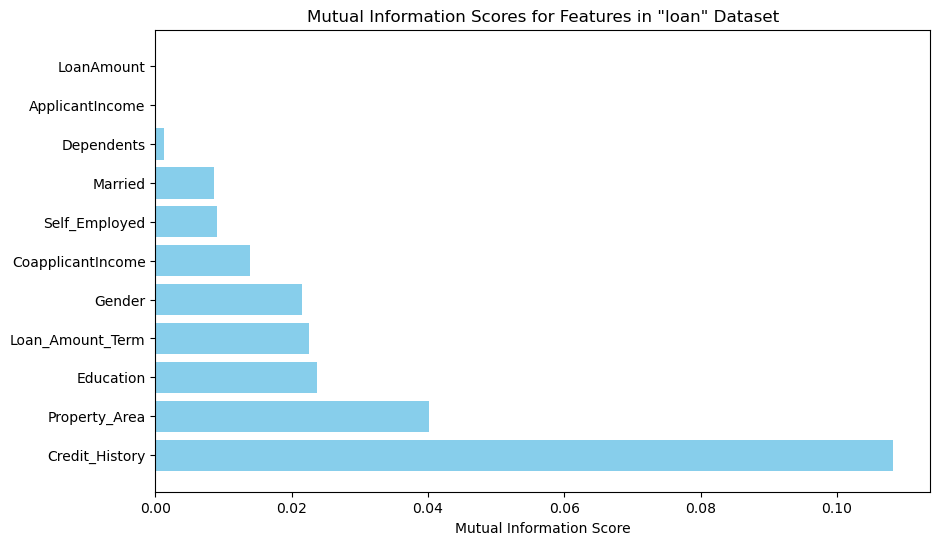

In [27]:
# Calculate mutual information scores
mutual_info_scores = mutual_info_classif(X, y)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info_Score': mutual_info_scores})

# Sort the DataFrame by mutual information scores for better visualization
mi_df = mi_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual_Info_Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Features in "loan" Dataset')
plt.show()

# Part 2: Mutual Information Regression

## Model-based Feature Selection Project

## For the model-based feature selection project, you will use the "Housing.csv" dataset

## Write a Python script that performs model-based feature selection using Mutual Information Regression on the "Housing" dataset.

### Tasks:

### 1. Load the dataset using the pandas library or any other suitable method.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [29]:
data1 = pd.read_csv("Housing.csv")

In [30]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [31]:
# Removing column "Id"

data1.drop("Id", axis=1, inplace=True)

In [32]:
data1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [33]:
data1.shape

(1460, 80)

### 2. Apply necessary processing on it (Hint : label_encoding , null value handling)

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [35]:
# Null Values

info = data1.isnull().sum()

null_value_cols = {}

for col, val in info.items():
    if val != 0 and val > 50: # Considering Columns where null values are greater than 50
        null_value_cols[col] = val

In [36]:
categorical_cols = data1.select_dtypes(include="object").columns
numerical_cols = data1.select_dtypes(include=["int64", "float64"]).columns

In [37]:
null_value_cols_category = {}
null_value_cols_numerical = {}

for col, val in null_value_cols.items():
    if col in categorical_cols:
        null_value_cols_category[col] = val
    else:
        null_value_cols_numerical[col] = val
        
data1['MasVnrArea'].fillna(data1['MasVnrArea'].mean(), inplace=True)

In [38]:
print("Null values of Categorical columns:")
null_value_cols_category

Null values of Categorical columns:


{'Alley': 1369,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [39]:
print("Null values of Numerical columns:")
null_value_cols_numerical

Null values of Numerical columns:


{'LotFrontage': 259, 'GarageYrBlt': 81}

In [40]:
# Null value handling for Numerical columns --> Median

print("NULL VALUES for Numerical Columns after handling null values using Median\n")
for col in null_value_cols_numerical.keys():
    data1[col].fillna(data1[col].median(), inplace=True)
    print(f"{col} : {data1[col].isnull().sum()}")

NULL VALUES for Numerical Columns after handling null values using Median

LotFrontage : 0
GarageYrBlt : 0


In [41]:
# Null value handling for Categorical columns --> Forward Fill

print("NULL VALUES for Categorical Columns after handling null values using Forward Fill\n")
for col in null_value_cols_category.keys():
    data1[col] = data1[col].fillna(data1[col].ffill())
    print(f"{col} : {data1[col].isnull().sum()}")

NULL VALUES for Categorical Columns after handling null values using Forward Fill

Alley : 21
FireplaceQu : 1
GarageType : 0
GarageFinish : 0
GarageQual : 0
GarageCond : 0
PoolQC : 197
Fence : 5
MiscFeature : 5


In [42]:
# Label_Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    data1[col] = le.fit_transform(data1[col])

In [43]:
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### 3. Separate the features (X) and the target variable (y : Price of the house) from the dataset.

In [45]:
X1 = data1.drop("SalePrice", axis=1)
y1 = data1["SalePrice"]

In [46]:
X1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,1,3,3,0,4,...,0,0,2,1,3,0,8,2007,8,4
1456,20,3,85.0,13175,1,1,3,3,0,4,...,0,0,2,2,3,0,2,2010,8,4
1457,70,3,66.0,9042,1,1,3,3,0,4,...,0,0,2,0,2,2500,5,2010,8,4
1458,20,3,68.0,9717,1,1,3,3,0,4,...,0,0,2,0,2,0,4,2010,8,4


In [47]:
y1

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [48]:
# Feature Selection

X1.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.035900,-0.356718,-0.139781,-0.024969,0.050300,0.119289,-0.002940,-0.022844,0.075910,...,-0.026030,0.008283,-0.047707,-0.006963,-0.021273,-0.007683,-0.013585,-0.021407,0.012464,-0.024940
MSZoning,0.035900,1.000000,-0.105961,-0.034452,0.087654,-0.107790,0.061887,-0.017854,-0.001192,-0.009895,...,0.019089,-0.003128,0.013037,0.052543,0.040821,0.009293,-0.031496,-0.020628,0.097437,0.009494
LotFrontage,-0.356718,-0.105961,1.000000,0.304522,-0.037349,-0.021978,-0.138877,-0.076080,-0.001027,-0.177821,...,0.037655,0.180819,0.037095,-0.011152,0.000370,-0.000255,0.010451,0.006380,-0.031412,0.058857
LotArea,-0.139781,-0.034452,0.304522,1.000000,-0.197131,-0.015093,-0.165315,-0.149083,0.010123,-0.121161,...,0.043160,0.077672,-0.037338,0.006405,-0.002413,0.038068,0.001205,-0.014261,0.012292,0.034169
Street,-0.024969,0.087654,-0.037349,-0.197131,1.000000,0.018783,-0.010224,0.115995,0.001682,0.013960,...,-0.033160,0.004413,0.001889,0.011677,-0.006867,-0.022733,0.003690,-0.025043,0.014339,0.006064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.007683,0.009293,-0.000255,0.038068,-0.022733,0.006713,-0.042061,0.020912,-0.002296,-0.018427,...,0.031946,0.029669,-0.028007,-0.019036,-0.122913,1.000000,-0.006495,0.004906,0.015773,0.013027
MoSold,-0.013585,-0.031496,0.010451,0.001205,0.003690,0.011904,-0.033455,-0.011599,-0.051552,0.018902,...,0.023217,-0.033737,-0.017106,-0.028205,-0.003088,-0.006495,1.000000,-0.145721,-0.047386,0.013320
YrSold,-0.021407,-0.020628,0.006380,-0.014261,-0.025043,-0.010572,0.036449,0.020507,0.023353,-0.005992,...,0.010694,-0.059689,-0.009520,-0.042718,-0.003764,0.004906,-0.145721,1.000000,-0.002327,0.003880
SaleType,0.012464,0.097437,-0.031412,0.012292,0.014339,-0.003568,-0.000911,-0.025754,-0.126770,0.014325,...,0.004533,0.011009,0.006514,-0.011449,-0.008577,0.015773,-0.047386,-0.002327,1.000000,0.184067


<Axes: >

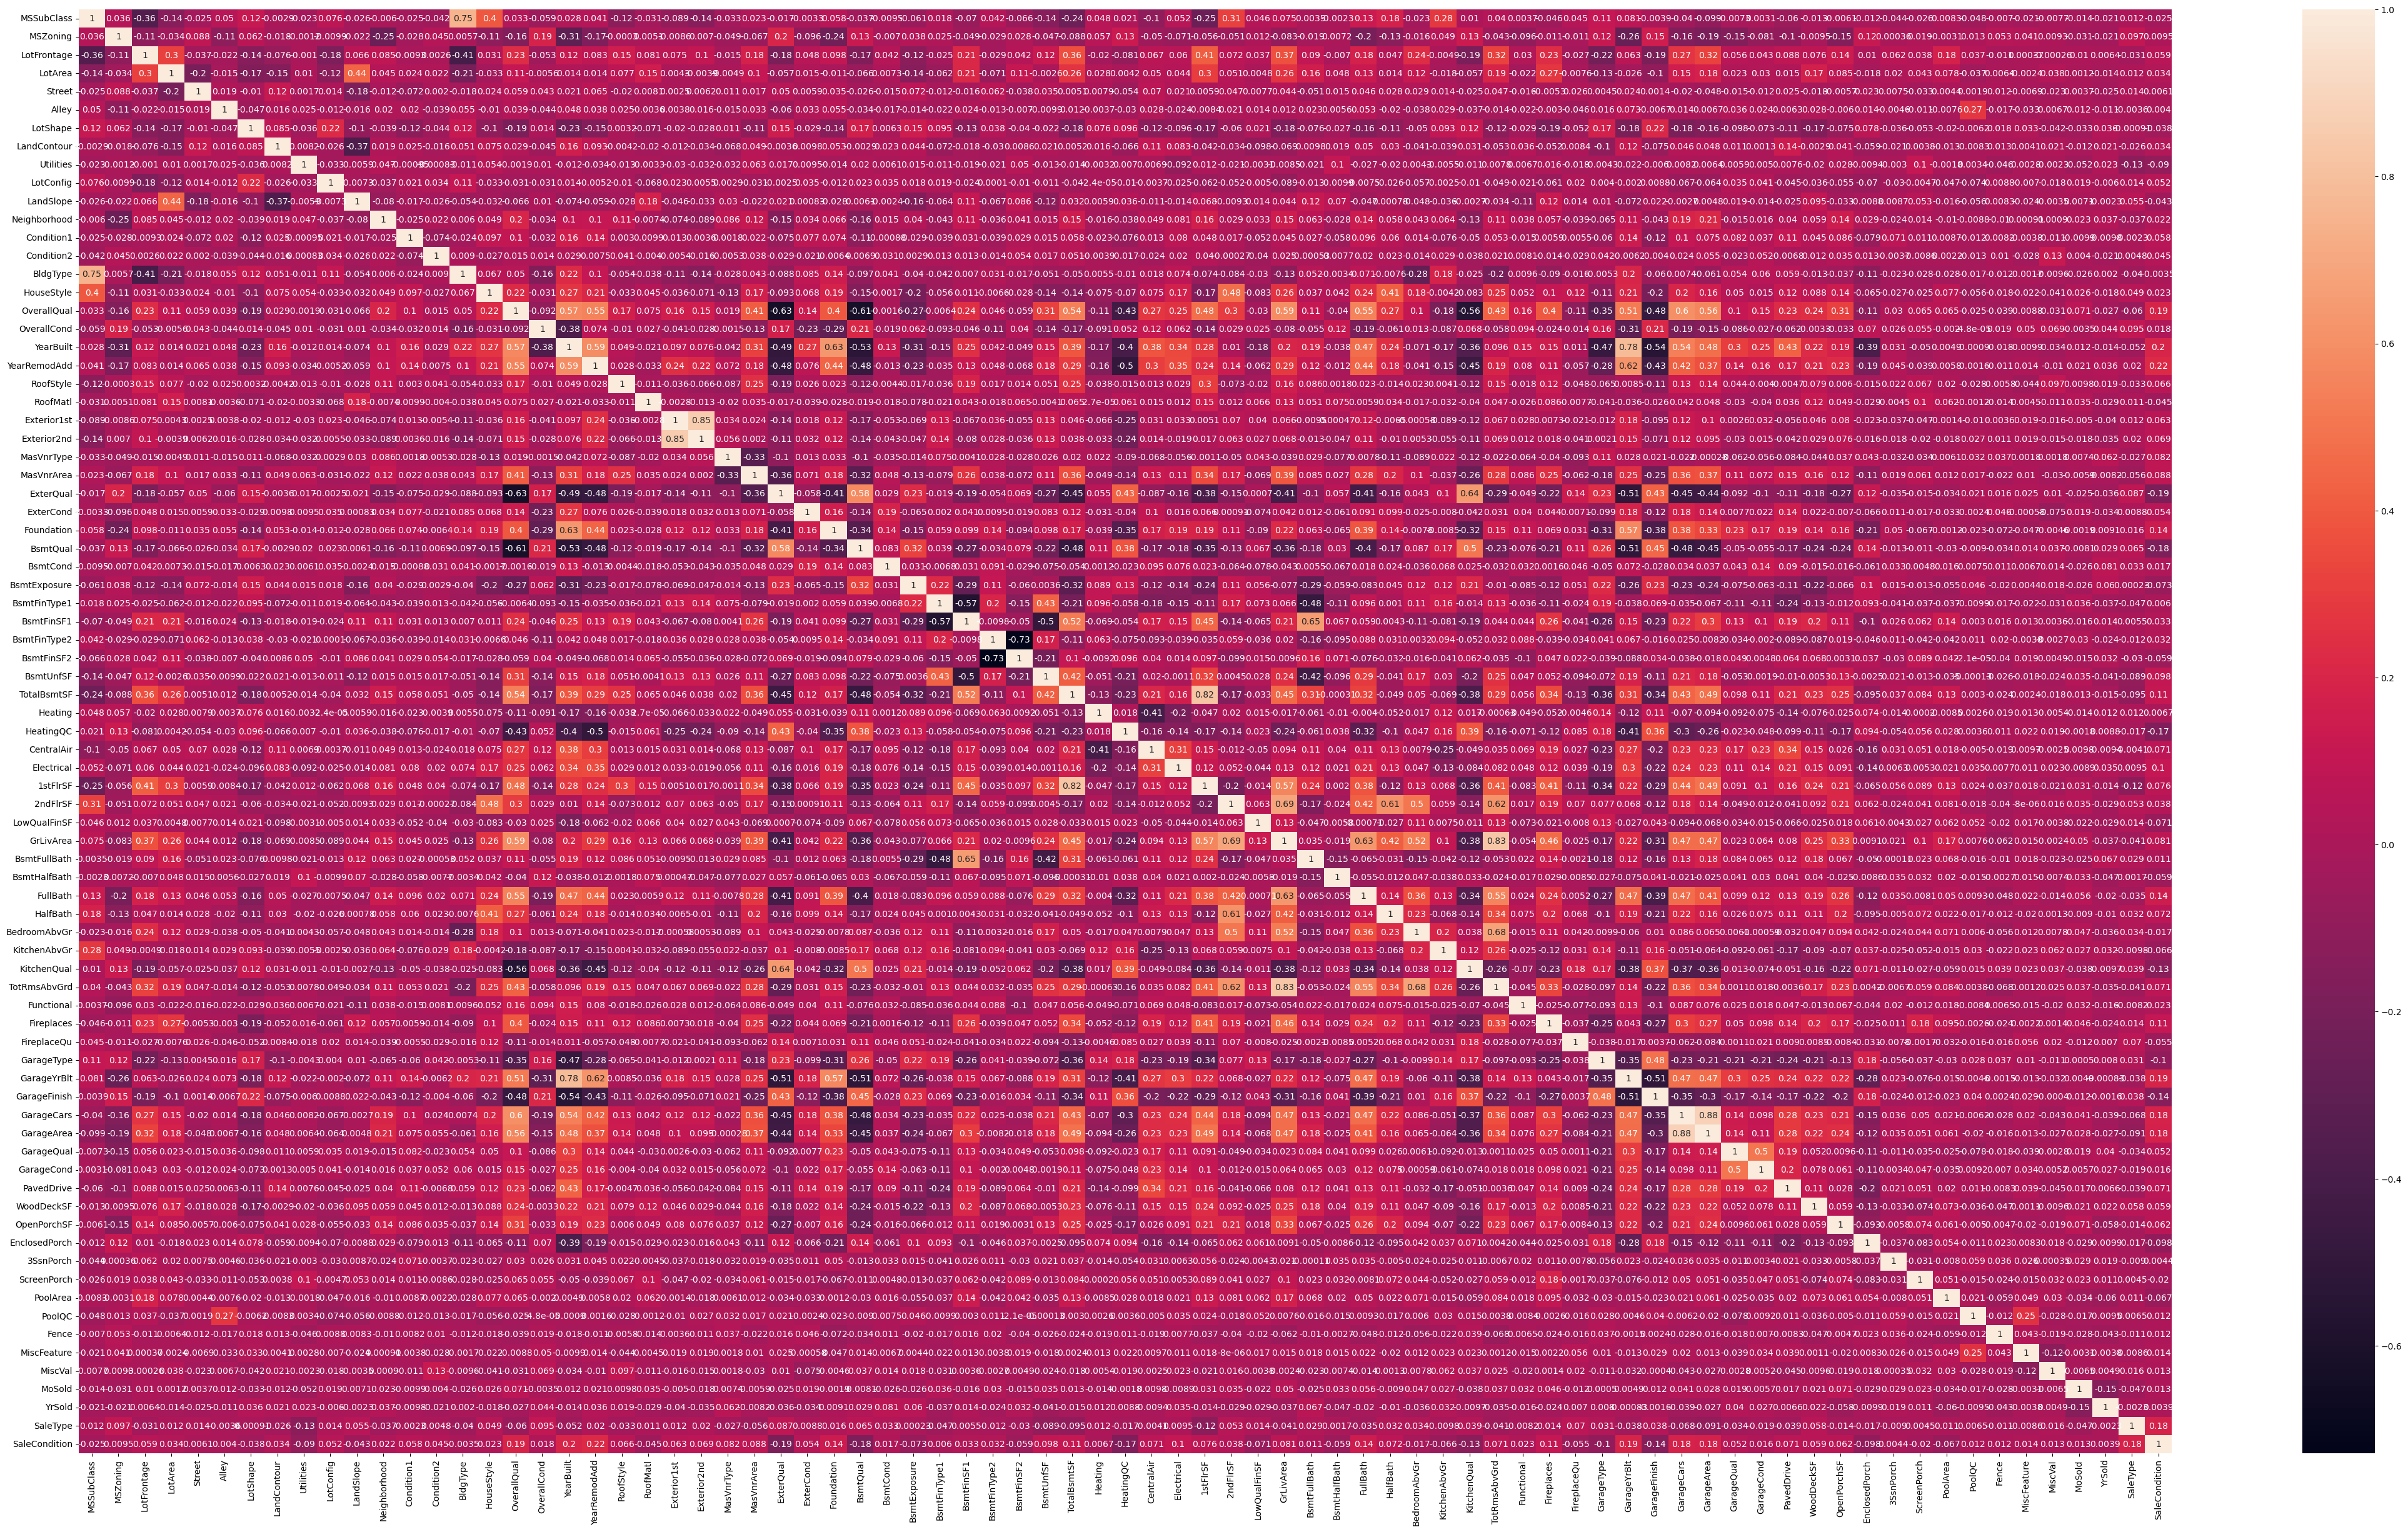

In [49]:
plt.figure(figsize=(54,30))
sns.heatmap(X1.corr(), annot=True)

In [50]:
def corr_columns(dataset, threshold):
    corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                corr.add(corr_matrix.columns[i])
    return corr

corr_cols = corr_columns(X1, 0.70)
corr_cols

{'1stFlrSF',
 'BldgType',
 'Exterior2nd',
 'GarageArea',
 'GarageYrBlt',
 'TotRmsAbvGrd'}

In [51]:
# Dropping columns having threshold > 0.70

X1.drop(list(corr_cols), axis=1, inplace=True)

### 4. Use the SelectKBest class from the sklearn.feature_selection module to select the top K features based on mutual information scores.

In [52]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [54]:
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(1168, 73) (1168,)
(292, 73) (292,)


### 5. Choose an appropriate value of K (number of features to select) for the analysis.

In [55]:
# Use SelectKBest with mutual information score
k1_best = SelectKBest(score_func=mutual_info_regression, k=5) # K = 5 (number of features to select)

### 6. Fit the feature selection model on the dataset and transform the feature matrix accordingly.

In [56]:
X1_train_k_best = k1_best.fit_transform(X1_train, y1_train)

### 7. Print the names or indices of the selected features.

In [57]:
selected_indices = k1_best.get_support(indices=True)
selected_features = X1.columns[selected_indices]

print("Selected Indices:", selected_indices)
print("Selected Features:", selected_features)

Selected Indices: [11 15 35 42 55]
Selected Features: Index(['Neighborhood', 'OverallQual', 'TotalBsmtSF', 'GrLivArea',
       'GarageCars'],
      dtype='object')


# Part 3 : Linear Regression on the Housing Dataset

## In this assignment, you will perform linear regression on the Housing dataset to predict house prices. Follow the instructions below:

### Tasks:

### 1. Load the Housing dataset using the pandas library.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [59]:
data2 = pd.read_csv("Housing.csv")

In [60]:
data2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
# Removing column "Id"

data2.drop("Id", axis=1, inplace=True)

### 2. Apply necessary preprocessing steps on the dataset, such as handling missing values and feature scaling if required.

In [62]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [63]:
data2.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [64]:
categorical_cols = data2.select_dtypes(include="object").columns
numerical_cols = data2.select_dtypes(include=["int64", "float64"]).columns

In [65]:
# Null Values

info = data2.isnull().sum()

null_value_cols = {}

for col, val in info.items():
    if val != 0 and val > 50: # Considering Columns where null values are greater than 50
        null_value_cols[col] = val

In [66]:
null_value_cols_category = {}
null_value_cols_numerical = {}

for col, val in null_value_cols.items():
    if col in categorical_cols:
        null_value_cols_category[col] = val
    else:
        null_value_cols_numerical[col] = val
        
data2['MasVnrArea'].fillna(data2['MasVnrArea'].mean(), inplace=True)

In [67]:
print("Null values of Categorical columns:")
null_value_cols_category

Null values of Categorical columns:


{'Alley': 1369,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [68]:
print("Null values of Numerical columns:")
null_value_cols_numerical

Null values of Numerical columns:


{'LotFrontage': 259, 'GarageYrBlt': 81}

In [69]:
# Null value handling for Numerical columns --> Median

print("NULL VALUES for Numerical Columns after handling null values using Median\n")
for col in null_value_cols_numerical.keys():
    data2[col].fillna(data2[col].median(), inplace=True)
    print(f"{col} : {data2[col].isnull().sum()}")

NULL VALUES for Numerical Columns after handling null values using Median

LotFrontage : 0
GarageYrBlt : 0


In [70]:
# Label_Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    data2[col] = le.fit_transform(data2[col])

In [71]:
# Null value handling for Categorical columns --> Forward Fill

print("NULL VALUES for Categorical Columns after handling null values using Forward Fill\n")
for col in null_value_cols_category.keys():
    data2[col] = data2[col].fillna(data2[col].ffill())
    print(f"{col} : {data2[col].isnull().sum()}")

NULL VALUES for Categorical Columns after handling null values using Forward Fill

Alley : 0
FireplaceQu : 0
GarageType : 0
GarageFinish : 0
GarageQual : 0
GarageCond : 0
PoolQC : 0
Fence : 0
MiscFeature : 0


In [72]:
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


In [73]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   Alley          1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [74]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler

normal = MinMaxScaler()

for col in data2.columns:
    data2[col] = normal.fit_transform(data2[col].values.reshape(-1, 1))

In [75]:
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.50,1.0,0.8,0.241078
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,0.363636,0.25,1.0,0.8,0.203583
2,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.727273,0.50,1.0,0.8,0.261908
3,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.090909,0.00,1.0,0.0,0.145952
4,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,1.0,1.0,1.0,0.0,1.000000,0.50,1.0,0.8,0.298709


### 3. Separate the features (X) and the target variable (y: house prices) from the dataset.

In [76]:
X2 = data2.drop("SalePrice", axis=1)
y2 = data2["SalePrice"]

In [77]:
X2

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.150685,0.033420,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.202055,0.038795,1.0,1.0,1.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.363636,0.25,1.0,0.8
2,0.235294,0.75,0.160959,0.046507,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.727273,0.50,1.0,0.8
3,0.294118,0.75,0.133562,0.038561,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.090909,0.00,1.0,0.0
4,0.235294,0.75,0.215753,0.060576,1.0,1.0,0.0,1.0,0.0,0.5,...,0.0,0.0,1.0,1.0,1.0,0.00000,1.000000,0.50,1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.140411,0.030929,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.636364,0.25,1.0,0.8
1456,0.000000,0.75,0.219178,0.055505,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.5,1.0,0.00000,0.090909,1.00,1.0,0.8
1457,0.294118,0.75,0.154110,0.036187,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.5,0.16129,0.363636,1.00,1.0,0.8
1458,0.000000,0.75,0.160959,0.039342,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.00000,0.272727,1.00,1.0,0.8


In [78]:
y2

0       0.241078
1       0.203583
2       0.261908
3       0.145952
4       0.298709
          ...   
1455    0.194556
1456    0.243161
1457    0.321622
1458    0.148903
1459    0.156367
Name: SalePrice, Length: 1460, dtype: float64

### 4. Split the dataset into training and testing sets using an 80:20 ratio.

In [79]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

(1168, 79) (1168,)
(292, 79) (292,)


In [80]:
# Use SelectKBest with mutual information score
k2_best = SelectKBest(score_func=mutual_info_regression, k=30) # K = 30 (number of features to select)

In [81]:
X2_train_k_best = k2_best.fit_transform(X2_train, y2_train)
X2_test_k_best = k2_best.transform(X2_test)  # Apply the transformation to the test set as well

In [82]:
selected_indices2 = k2_best.get_support(indices=True)
selected_features2 = X2.columns[selected_indices2]

print("Selected Indices:", selected_indices2)
print("Selected Features:", selected_features2)

Selected Indices: [ 0  2  3 11 16 18 19 22 23 26 28 29 32 36 37 39 42 43 45 48 52 53 55 56
 57 58 59 60 61 66]
Selected Features: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtFinType1', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'OpenPorchSF'],
      dtype='object')


In [83]:
print(len(selected_features2))

30


### 5. Fit a linear regression model to the training data using the LinearRegression class from the sklearn.linear_model module.

In [84]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X2_train_k_best, y2_train)

LinearRegression()

### 6. Predict house prices for the testing data using the trained model.

In [85]:
# Resetting indices for X2_test_k_best
X2_test_k_best = pd.DataFrame(X2_test_k_best, index=y2_test.index)

y_pred = model.predict(X2_test_k_best)

### 7. Evaluate the performance of the model by calculating the mean squared error (MSE) and the coefficient of determination (R^2) using appropriate functions from the sklearn.metrics module.

In [93]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y2_test, y_pred, squared=False)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y2_test, y_pred)

### 8. Print the MSE and R^2 values to assess the model's accuracy.

In [94]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.2229606589043535
R^2 Score: 0.83


### 9. Plot a scatter plot between the predicted house prices and the actual house prices for the testing data using the matplotlib library.

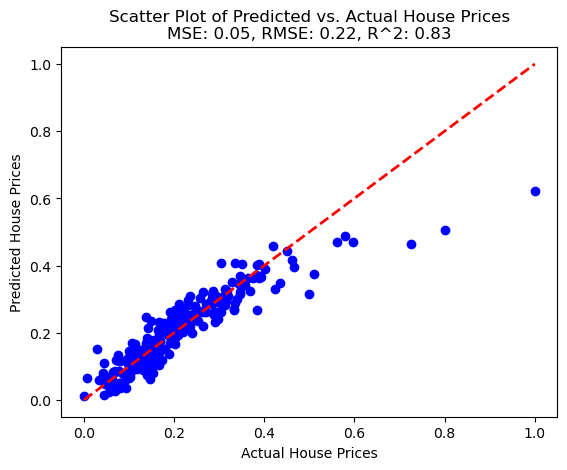

In [97]:
# Plot a scatter plot between predicted and actual house prices

plt.scatter(y2_test, y_pred, color='blue')
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Scatter Plot of Predicted vs. Actual House Prices\nMSE: {:.2f}, RMSE: {:.2f}, R^2: {:.2f}'.format(mse, rmse, r2))
plt.show()

**Linear Regression Model Evaluation:**
- **Mean Squared Error (MSE):** 0.05
  - The average squared difference between predicted and actual values is 0.05. Lower MSE values indicate better model performance.

- **Root Mean Squared Error (RMSE):** 0.22
  - The square root of the MSE, which represents the average magnitude of errors in the predicted values. In this case, the RMSE is 0.22.

- **R^2 Score:** 0.83
  - The coefficient of determination, indicating the proportion of the variance in the dependent variable that is predictable from the independent variable. An R^2 score of 0.83 suggests that the model explains 83% of the variance in the target variable.

**Summary:**
The Linear Regression model appears to perform well, with a relatively low mean squared error and root mean squared error. The R^2 score indicates a high level of explanatory power, suggesting that the model captures a significant portion of the variance in the target variable. This indicates good predictive performance, but further analysis and consideration of specific use case requirements are advisable.